# Import & Load Data

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The dataset has 7043 rows and 21 columns. 

There are 17 categorical features:

* CustomerID: Customer ID unique for each customer
* gender: Whether the customer is a male or a female
* SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
* Partner: Whether the customer has a partner or not (Yes, No)
* Dependent: Whether the customer has dependents or not (Yes, No)
* PhoneService: Whether the customer has a phone service or not (Yes, No)
* MultipeLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service)
* DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract: The contract term of the customer (Month-to-month, One year, Two years)
* PaperlessBilling: The contract term of the customer (Month-to-month, One year, Two years)
* PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
---
* 3 numerical features:
* Tenure: Number of months the customer has stayed with the company
* MonthlyCharges: The amount charged to the customer monthly
* TotalCharges: The total amount charged to the customer
---

* prediction feature:
* Churn: Whether the customer churned or not (Yes or No)
---
* These features can also be subdivided into:
* Demographic customer information: gender , SeniorCitizen , Partner , Dependents
* Services that each customer has signed up for: PhoneService , MultipleLines , InternetService , OnlineSecurity , OnlineBackup , DeviceProtection , TechSupport , StreamingTV , StreamingMovies
* Customer account information: tenure , Contract , PaperlessBilling , PaymentMethod , MonthlyCharges , TotalCharges

# Basic inspection

In [32]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [33]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


C:\Users\Asus\AppData\Local\Temp\ipykernel_20500\2576541415.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


# Target distribution

In [34]:
df['Churn'].value_counts(normalize=True)


Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

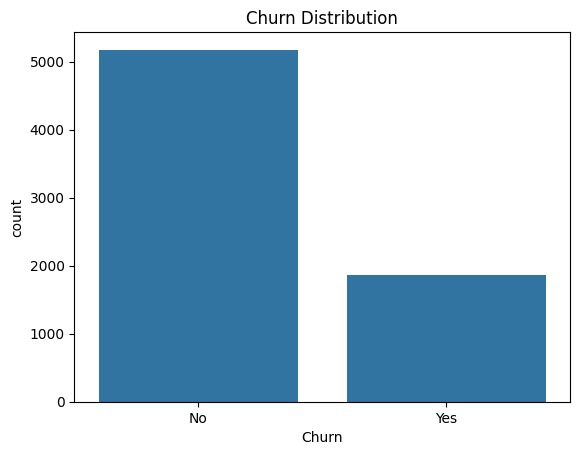

In [35]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


# Numerical feature analysis

In [37]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

df[num_cols].describe()


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


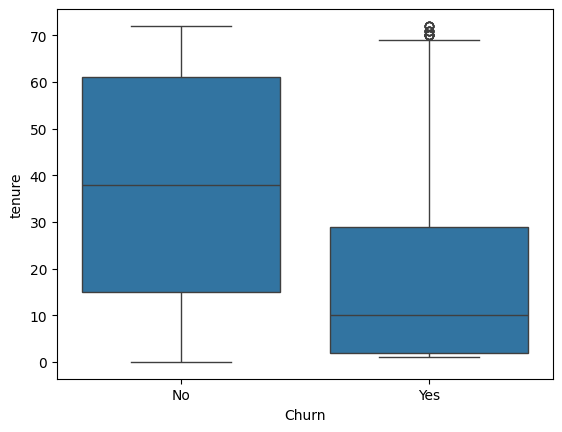

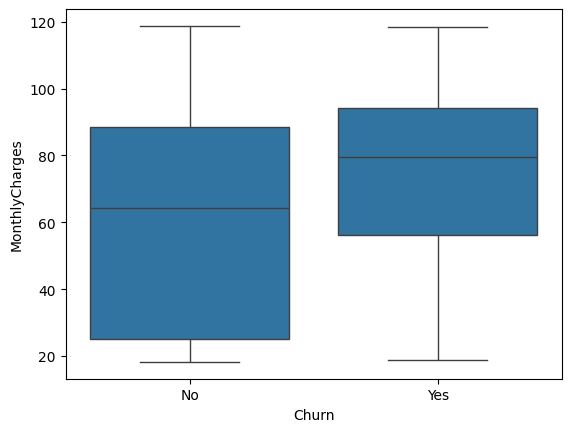

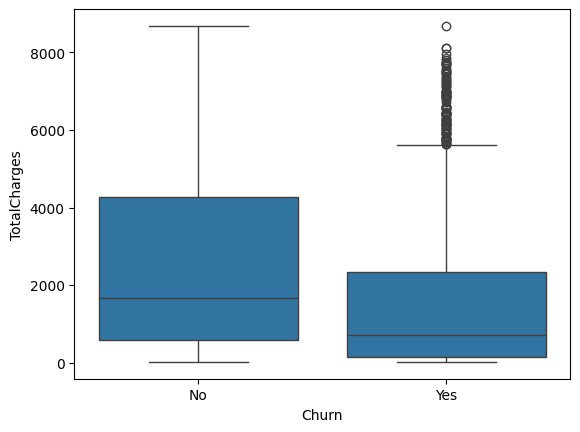

In [38]:
for col in num_cols:
    sns.boxplot(x='Churn', y=col, data=df)
    plt.show()


# Categorical feature analysis

In [39]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols = cat_cols.drop('Churn')


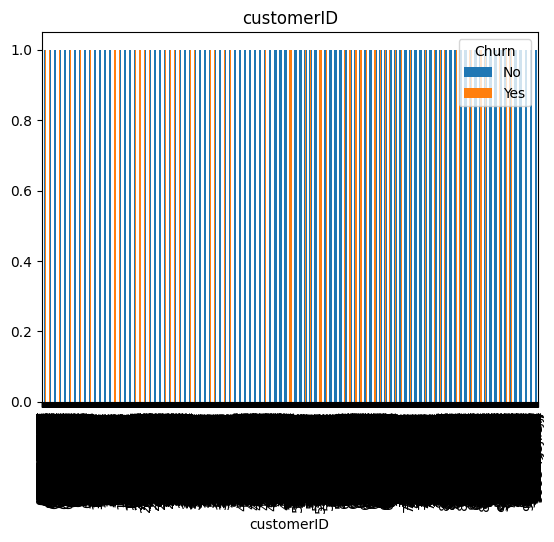

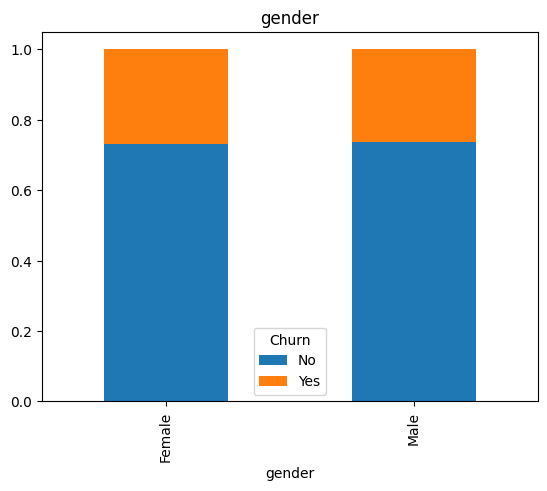

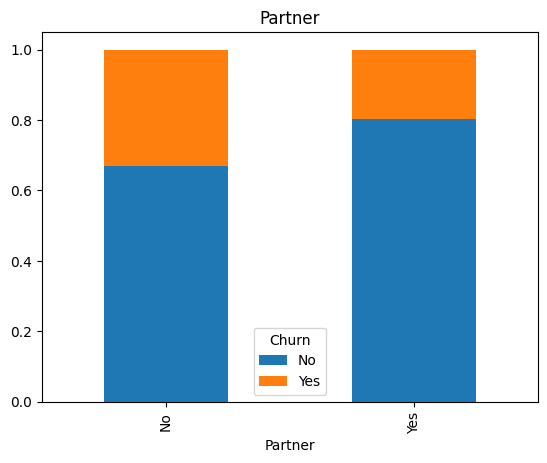

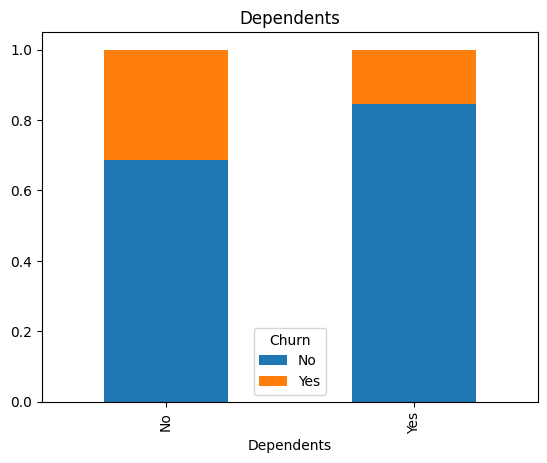

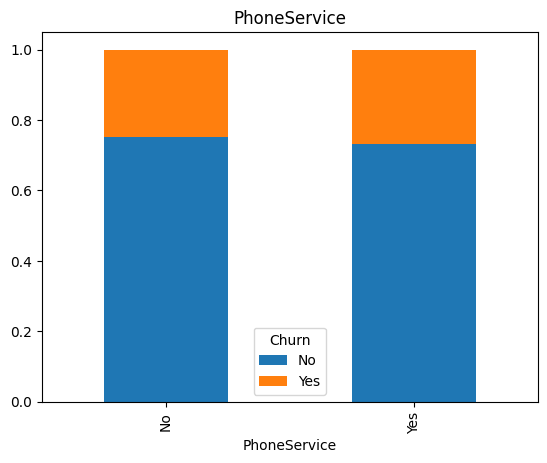

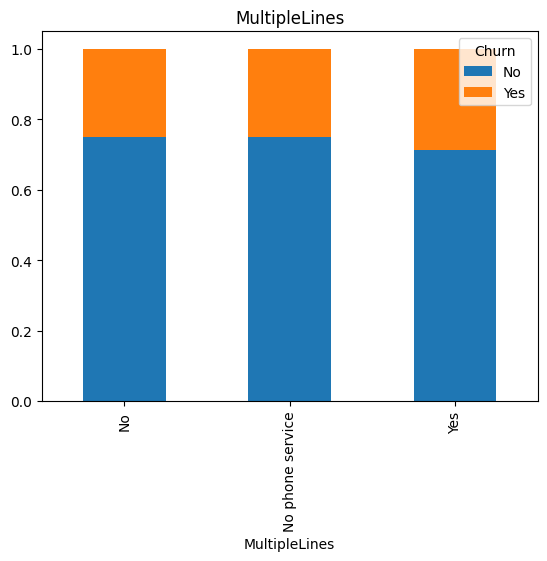

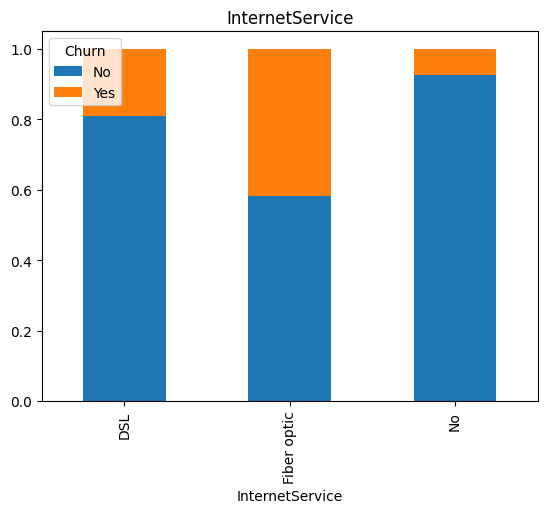

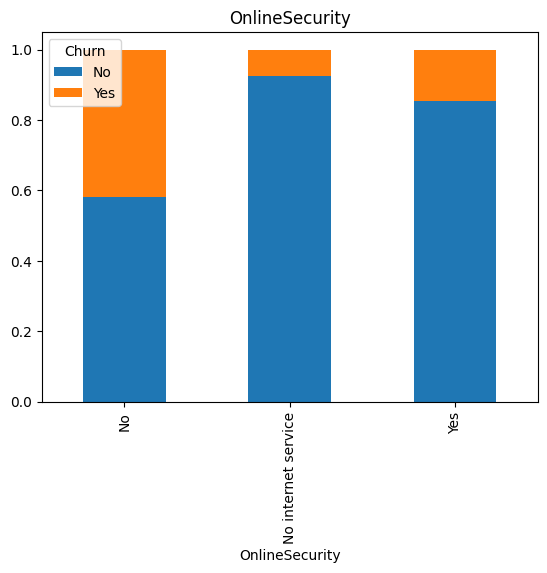

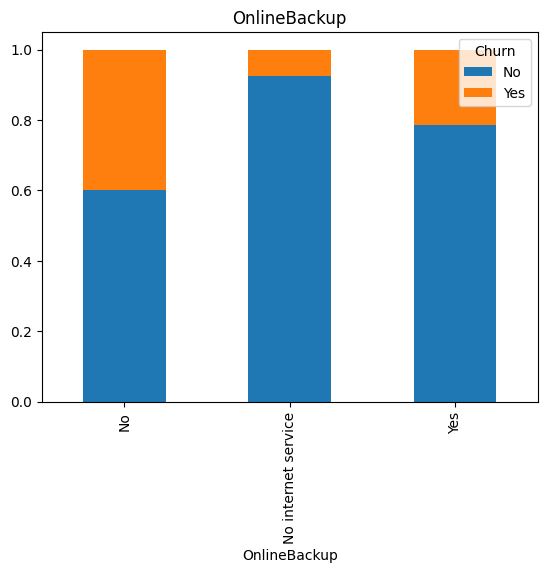

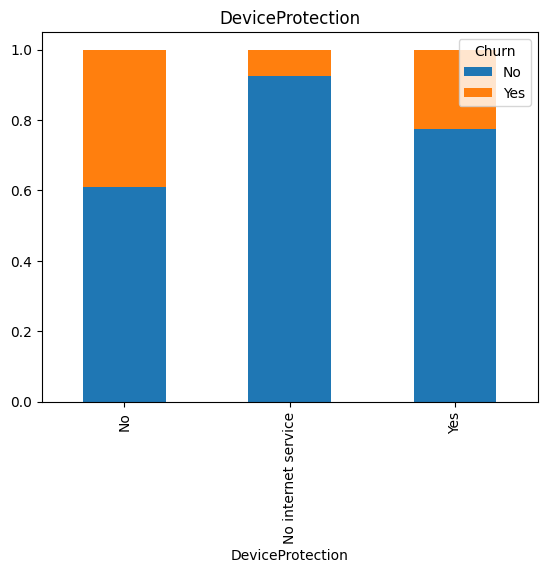

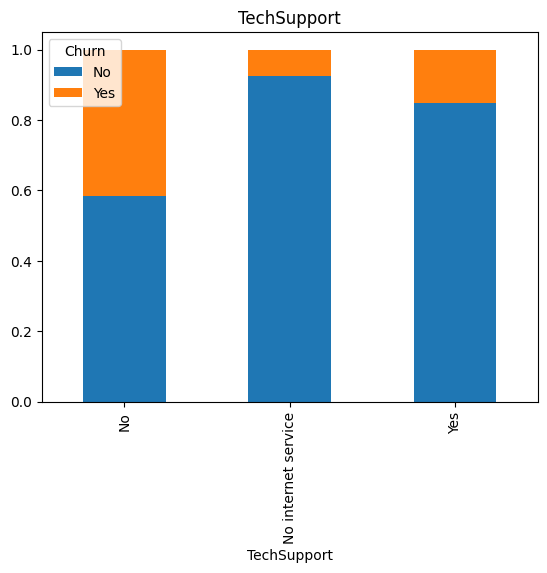

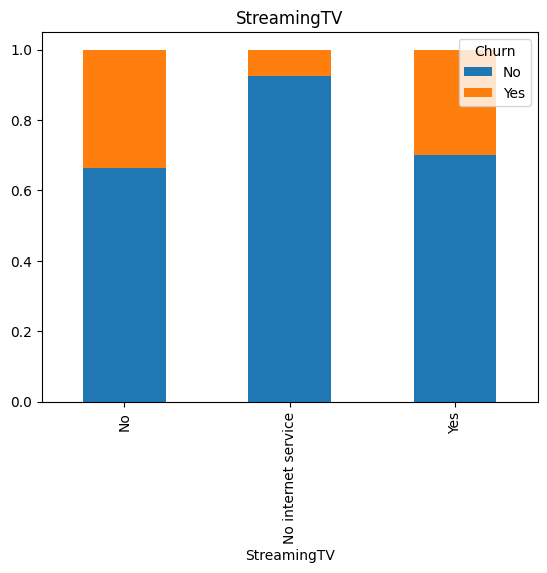

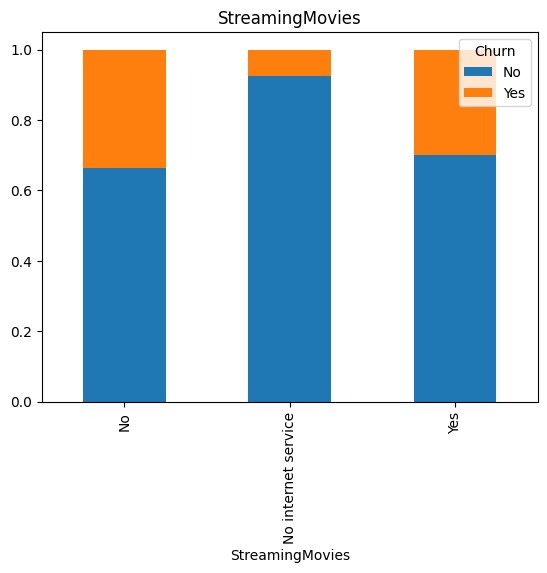

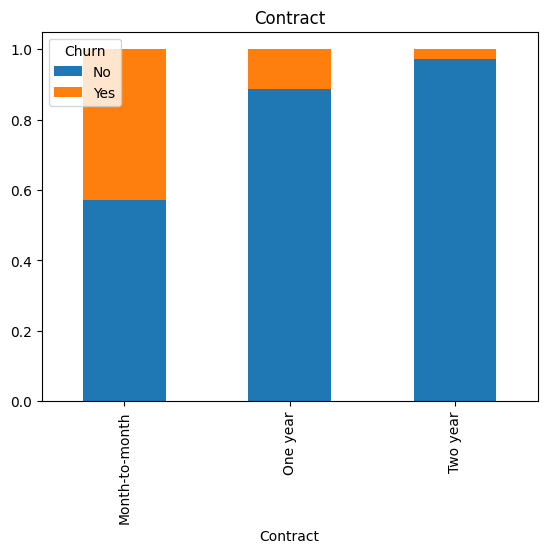

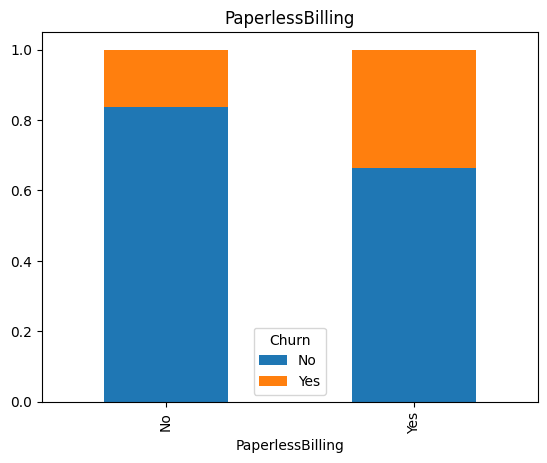

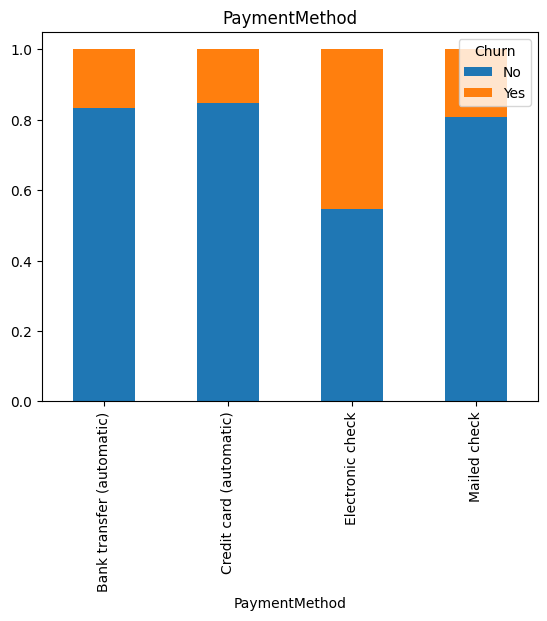

In [40]:
for col in cat_cols:
    churn_rate = df.groupby(col)['Churn'].value_counts(normalize=True).unstack()
    churn_rate.plot(kind='bar', stacked=True)
    plt.title(col)
    plt.show()


# Correlation


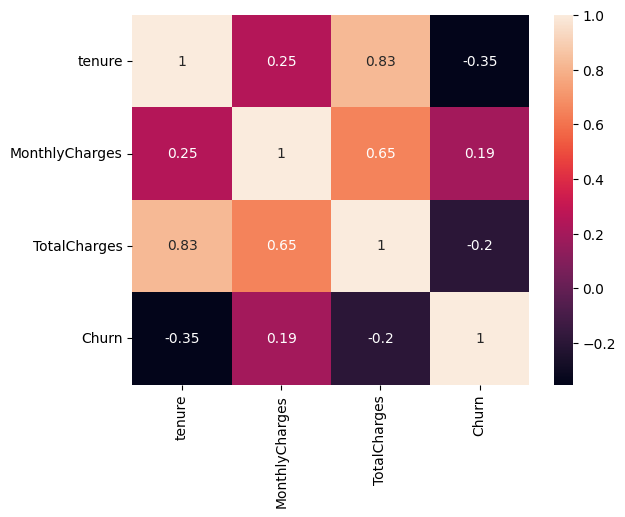

In [44]:
sns.heatmap(
    df.assign(Churn=df['Churn'].eq('Yes').astype(int))
      [['tenure','MonthlyCharges','TotalCharges','Churn']]
      .corr(),
    annot=True
)
plt.show()


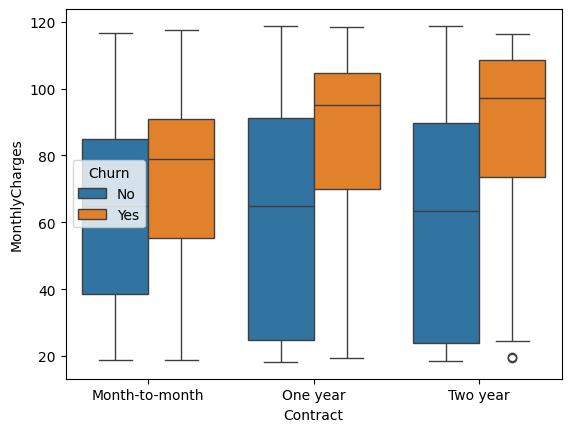

In [47]:
sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df)
plt.show()


In [48]:
df.drop('customerID', axis=1, inplace=True)